# Principle Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
sns.set()

In [2]:
# constants

PATH = '../data/all_seasons.csv' # https://www.kaggle.com/justinas/nba-players-data

## Import Data

In [3]:
df = pd.read_csv(PATH).drop(columns = ['Unnamed: 0'])
print(df.shape)

(11700, 21)


## EDA

In [5]:
def single_col_avg_viz_fn(df, c1, avg_col, title):
    plt.clf()
    res = df.groupby([c1])[avg_col].mean().reset_index()
    res.plot(x = c1, y = avg_col, kind = 'line', color = 'maroon')
    plt.title(title)
    plt.show()
    return res

<Figure size 432x288 with 0 Axes>

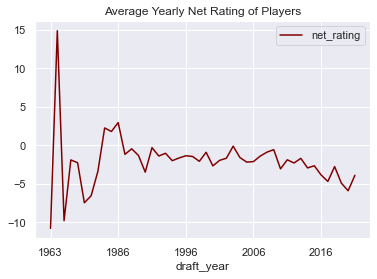

In [6]:
_ = single_col_avg_viz_fn(df = df, c1 = 'draft_year', avg_col = 'net_rating', title = 'Average Yearly Net Rating of Players')

<Figure size 432x288 with 0 Axes>

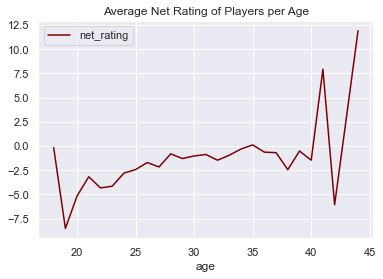

In [7]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'net_rating', title = 'Average Net Rating of Players per Age')

<Figure size 432x288 with 0 Axes>

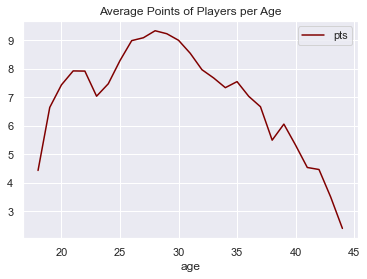

In [8]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'pts', title = 'Average Points of Players per Age')

<Figure size 432x288 with 0 Axes>

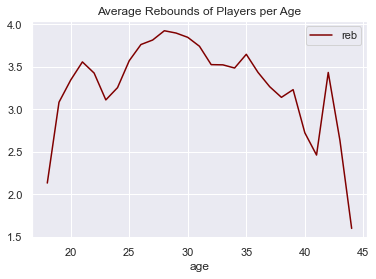

In [9]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'reb', title = 'Average Rebounds of Players per Age')

<Figure size 432x288 with 0 Axes>

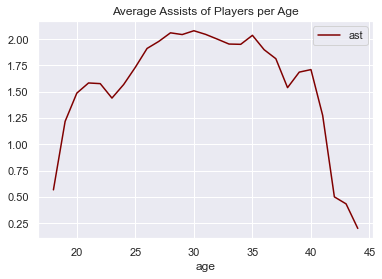

In [10]:
_ = single_col_avg_viz_fn(df = df, c1 = 'age', avg_col = 'ast', title = 'Average Assists of Players per Age')

In [13]:
num_feats = list(df._get_numeric_data().columns)

<Figure size 432x288 with 0 Axes>

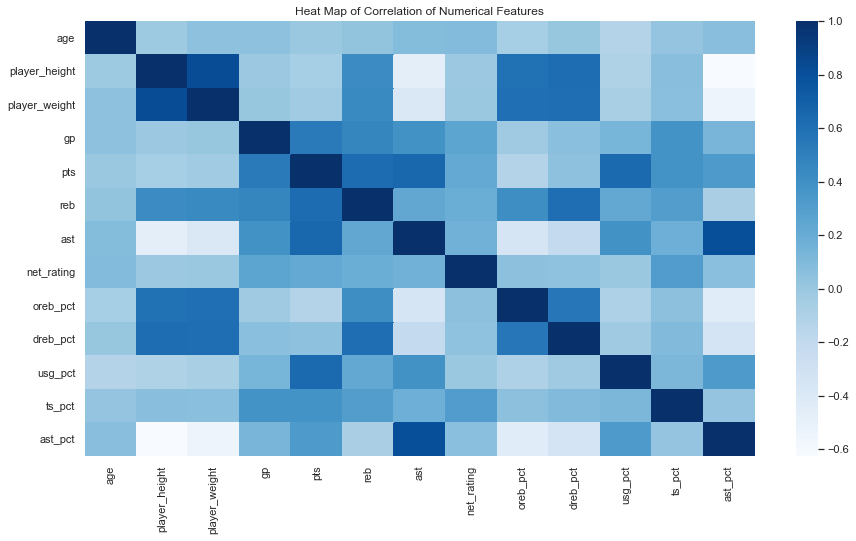

In [14]:
plt.clf()
plt.figure(figsize = (15,8))
sns.heatmap(df[num_feats].corr(), cmap = 'Blues')
plt.title('Heat Map of Correlation of Numerical Features')
plt.show()

## Dimensionality Reduction

In [15]:
emb_df = df[num_feats]

In [21]:
pca = PCA(n_components = 3, random_state = 7)
pca_mdl = pca.fit_transform(emb_df)

## Visualize

[]

<Figure size 432x288 with 0 Axes>

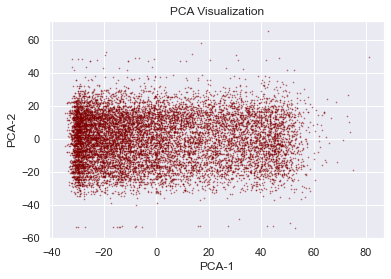

In [26]:
emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y', 'z'],
        index = emb_df.index
    )
)
plt.clf()
fig = plt.figure(figsize=(6,4))
plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()

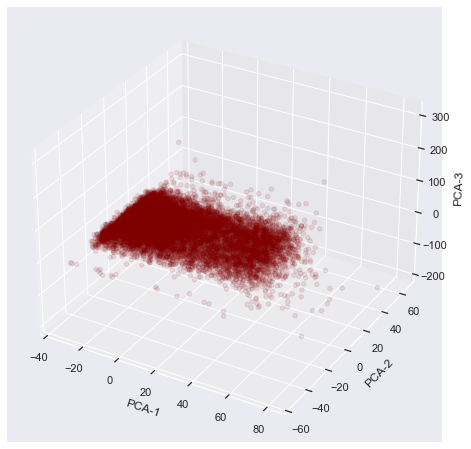

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = emb_df_PCA['x']
ys = emb_df_PCA['y']
zs = emb_df_PCA['z']
ax.scatter(xs, ys, zs, alpha = 0.1, color = 'maroon')

ax.set_xlabel('PCA-1')
ax.set_ylabel('PCA-2')
ax.set_zlabel('PCA-3')

plt.show()